In [1]:
import pandas as pd
import nltk
import gensim
import spacy
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from PIL import Image

C:\Users\Amey\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
nlp=spacy.load('en_core_web_sm')

In [3]:
data = pd.read_csv(r"G:\study\Natural Language processing\nlp_class\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [4]:
corpus=data['reviews.text'].tolist()

In [5]:
dict={}
data1=[]

In [6]:
for i in range(len(corpus)):
    doc = nlp(corpus[i])
    c=""
    for j in range(len(doc)):
        w = doc[j].lemma_
        z = doc[j].pos_
        if z == 'ADJ':
            c = c+w+" "
            if w not in dict:
                dict[w]=1
            else:
                x=dict[w]
                x=x+1
                dict[w]=x
    data1.append(c)        

In [8]:
len(dict)

1866

In [9]:
data2=[]

In [10]:
for i in range(len(data1)):
    if len(data1[i])!=0:
        data2.append(data1[i].rstrip())

In [12]:
from wordcloud import WordCloud

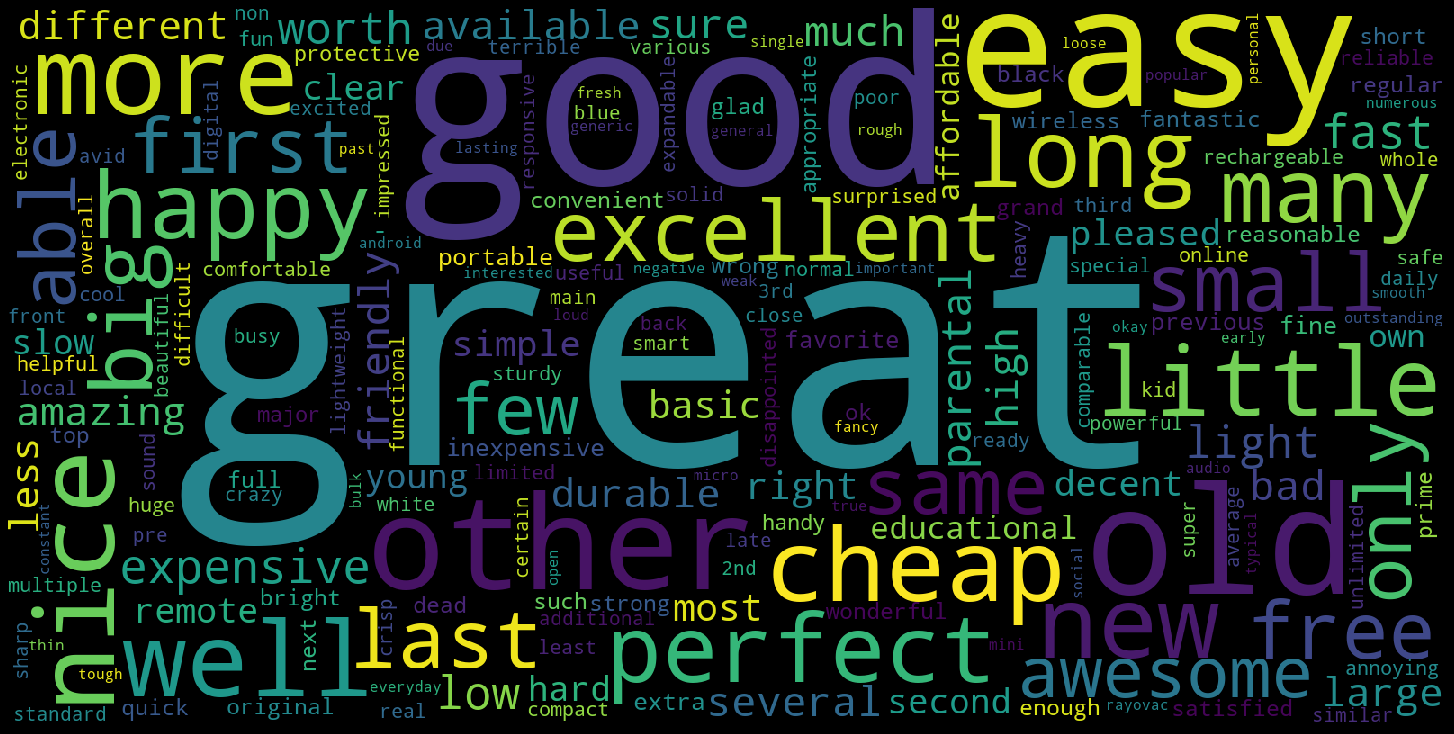

In [13]:
wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(dict)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
sentiment=[]
for i in range(len(data2)):
    blob = TextBlob(data2[i])
    x=blob.sentiment
    sentiment.append(x.polarity)

In [16]:
len(sentiment),len(data2)

(24691, 24691)

In [17]:
final_data = pd.DataFrame()

In [18]:
final_data['Review_Adjectives'] = data2

In [19]:
final_data['Sentiment'] = sentiment

In [20]:
final_data.head(10)

Review_Adjectives  Sentiment
0                             bad backup  -0.700000
1                              expensive  -0.500000
2                                  happy   0.800000
3                                   well   0.000000
4                                  great   0.800000
5                       good easy arrive   0.566667
6                                pleased   0.500000
7  cheap non - rechargeable perfect more   0.633333
8                                   high   0.160000
9                                   good   0.700000